In [263]:
import numpy as np
import time

### Load Data

In [264]:
# Load 
x_train = np.load('data_npy/x_train.npy')
y_train = np.load('data_npy/y_train.npy')
x_test = np.load('data_npy/x_test.npy')
y_test = np.load('data_npy/y_test.npy')

# shape
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (8239, 6, 128)
y_train shape: (8239,)
x_test shape: (2060, 6, 128)
y_test shape: (2060,)


In [265]:
print(x_train)
print(y_train)

[[[-2.955706e-01 -2.973497e-01 -7.185090e-02 ...  4.694775e-01
    5.115014e-01  3.841527e-01]
  [ 4.133848e-02  1.966760e-01  3.118196e-01 ...  1.074501e-01
    1.813511e-01  1.813961e-01]
  [-2.175047e-01 -2.923019e-01 -3.364541e-01 ...  1.092480e-01
    1.480044e-02 -1.500882e-01]
  [ 7.814702e-02  2.045125e-01  1.349293e-01 ...  3.232122e-01
    1.046657e-01 -1.651919e-01]
  [-9.844646e-01 -6.932494e-01 -2.179860e-01 ... -4.846273e-01
   -2.734270e-01  6.718352e-01]
  [ 6.667712e-01  6.991225e-01  6.443475e-01 ... -7.751060e-01
   -9.245042e-01 -6.819656e-01]]

 [[-1.715811e-02 -3.178280e-02 -3.937447e-02 ...  9.891383e-02
    1.098336e-01  1.469693e-01]
  [ 4.283680e-03  9.682415e-02  1.554539e-01 ...  2.652732e-01
    1.381612e-01  2.044002e-02]
  [-1.127350e-01 -8.266044e-02 -3.003632e-02 ...  8.305199e-02
    1.056857e-01  6.428699e-02]
  [ 3.944168e-01  3.769730e-01  3.958352e-01 ... -1.663394e-01
    1.350868e-01  3.623121e-01]
  [ 2.362847e-01  4.174809e-01  4.147253e-01 ...

In [266]:
print(x_test)
print(y_test)

[[[ 3.431445e-01 -2.198824e-01 -3.635291e-01 ... -1.352959e-01
   -1.961829e-01 -2.246079e-01]
  [-1.758625e-01 -1.721152e-01 -2.935536e-01 ... -2.901333e-02
    4.940418e-02  1.508563e-01]
  [ 2.214099e-01  2.914912e-01  2.847791e-01 ...  4.354688e-02
   -3.111895e-02 -1.186902e-01]
  [ 1.705271e-01  2.656858e-01  3.631090e-01 ...  1.000009e+00
    8.364557e-01  7.397191e-01]
  [ 1.760619e-01 -4.977707e-01 -8.012118e-01 ... -1.279613e+00
   -1.151442e+00 -1.066346e+00]
  [ 2.594900e-01  2.007621e-01  2.046549e-02 ... -1.949560e-01
   -1.161068e-01 -4.993718e-02]]

 [[ 9.183939e-03  8.571481e-03  5.968489e-03 ...  3.258547e-02
    3.552567e-02  3.024754e-02]
  [ 1.309591e-03  4.265143e-03  6.054279e-03 ... -1.890899e-03
    1.837978e-02  1.401014e-02]
  [ 2.010833e-02  2.019429e-02  1.830404e-02 ... -1.075705e-02
    1.345826e-03 -2.675747e-03]
  [-1.627661e-02 -9.017916e-03 -9.390966e-03 ...  3.462532e-02
    2.540286e-02  1.292184e-02]
  [-3.889265e-02 -2.092474e-02 -8.113427e-03 ...

### Standardized

In [267]:
def one_hot_encode(y, num_classes):
    y = y.astype(int)
    if np.min(y) == 1:  # Kiểm tra xem nhãn có bắt đầu từ 1 không, nếu k thì -1
        y = y - 1
    return np.eye(num_classes)[y]

# Số lớp (class) 
num_classes = 6


print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

#one-hot encoding
y_train_one_hot = one_hot_encode(y_train, num_classes)
y_test_one_hot = one_hot_encode(y_test, num_classes)

print(f"y_train_one_hot shape: {y_train_one_hot.shape}")
print(f"y_test_one_hot shape: {y_test_one_hot.shape}")


y_train shape: (8239,)
y_test shape: (2060,)
y_train_one_hot shape: (8239, 6)
y_test_one_hot shape: (2060, 6)


In [ ]:
# Flatten dữ liệu đầu vào
x_train_flattened = x_train.reshape(x_train.shape[0], -1)  # Shape: (num_samples, 768)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)     # Shape: (num_samples, 768)
print(x_train_flattened.shape)
print(x_test_flattened.shape)


### Building Neural Network

In [268]:
class NeuralNetwork:
    def __init__(self, sizes, epochs=100, lr=0.01, dropout_rate=0.5):
        self.sizes = sizes
        self.epochs = epochs
        self.lr = lr
        self.dropout_rate = dropout_rate

        # Initialize weights with He initialization
        self.params = {
            f'W{i}': np.random.randn(sizes[i], sizes[i-1]) * np.sqrt(2. / sizes[i-1])
            for i in range(1, len(sizes))
        }
        self.params.update({
            f'b{i}': np.zeros((sizes[i], 1)) for i in range(1, len(sizes))
        })

        self.loss_history = []
        self.acc_history = []

    def relu(self, x, derivative=False):
        if derivative:
            return (x > 0).astype(float)
        return np.maximum(0, x)

    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=0, keepdims=True))
        return exps / np.sum(exps, axis=0, keepdims=True)

    def forward_pass(self, x):
        self.params['A0'] = x
        for i in range(1, len(self.sizes)):
            self.params[f'Z{i}'] = np.dot(self.params[f'W{i}'], self.params[f'A{i-1}']) + self.params[f'b{i}']
            if i < len(self.sizes) - 1:
                self.params[f'A{i}'] = self.relu(self.params[f'Z{i}'])
            else:
                self.params[f'A{i}'] = self.softmax(self.params[f'Z{i}'])
        return self.params[f'A{len(self.sizes)-1}']

    def backward_pass(self, y, output):
        grads = {}
        error = output - y

        for i in reversed(range(1, len(self.sizes))):
            grads[f'W{i}'] = np.dot(error, self.params[f'A{i-1}'].T)
            grads[f'b{i}'] = np.sum(error, axis=1, keepdims=True)
            if i > 1:
                error = np.dot(self.params[f'W{i}'].T, error) * self.relu(self.params[f'Z{i-1}'], derivative=True)
        return grads

    def update_parameters(self, grads):
        for key in self.params.keys():
            if key in grads:
                self.params[key] -= self.lr * grads[key]

    def compute_loss(self, y, output):
        loss = -np.mean(np.sum(y * np.log(output + 1e-9), axis=1))
        return loss

    def train(self, x_train, y_train, x_test, y_test):
        for epoch in range(self.epochs):
            loss = 0
            for i in range(x_train.shape[0]):
                x = x_train[i].reshape(-1, 1)
                y = y_train[i].reshape(-1, 1)
                output = self.forward_pass(x)
                loss += self.compute_loss(y, output)
                grads = self.backward_pass(y, output)
                self.update_parameters(grads)

            loss /= x_train.shape[0]
            self.loss_history.append(loss)
            accuracy = self.compute_accuracy(x_test, y_test)
            self.acc_history.append(accuracy)

            print(f"Epoch {epoch + 1}/{self.epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.2f}%")

    def compute_accuracy(self, x_test, y_test):
        correct_predictions = 0
        for i in range(x_test.shape[0]):
            x = x_test[i].reshape(-1, 1)
            y = np.argmax(y_test[i])
            output = self.forward_pass(x)
            if np.argmax(output) == y:
                correct_predictions += 1
        return correct_predictions / x_test.shape[0] * 100
    
    def save_weights_and_bias_bin(self):
        # Lấy trọng số và bias
        weights_layer1 = self.params['W1']
        bias_layer1 = self.params['b1']
        weights_layer2 = self.params['W2']
        bias_layer2 = self.params['b2']
        weights_layer3 = self.params['W3']
        bias_layer3 = self.params['b3']
        weights_layer4 = self.params['W4']
        bias_layer4 = self.params['b4']
        weights_layer5 = self.params['W5']
        bias_layer5 = self.params['b5']
        weights_layer6 = self.params['W6']
        bias_layer6 = self.params['b6']
        
        # Gộp tất cả trọng số và bias vào một mảng numpy
        weights_and_bias = np.concatenate([weights_layer1.flatten(), bias_layer1.flatten(),
                                          weights_layer2.flatten(), bias_layer2.flatten(),
                                          weights_layer3.flatten(), bias_layer3.flatten(),
                                          weights_layer4.flatten(), bias_layer4.flatten(),
                                          weights_layer5.flatten(), bias_layer5.flatten(),
                                          weights_layer6.flatten(), bias_layer6.flatten()])
        
        # Lưu vào tệp nhị phân
        weights_and_bias.tofile('weights_and_bias_5_layer.bin')

    def predict(self, x):
        x = x.reshape(x.shape[0], -1)  # Đảm bảo đầu vào có đúng shape
        output = self.forward_pass(x.T)  # Chuyển x thành (num_features, num_samples)
        return np.argmax(output, axis=0)


### Training the model

In [262]:
model = NeuralNetwork(sizes=[768, 128, 64, 64, 32, 16, 6], epochs=100, lr=0.005)
model.train(x_train_flattened, y_train_one_hot, x_test_flattened, y_test_one_hot)
model.save_weights_and_bias_bin()

Epoch 1/100, Loss: 0.1677, Accuracy: 63.54%
Epoch 2/100, Loss: 0.1124, Accuracy: 67.23%
Epoch 3/100, Loss: 0.0988, Accuracy: 68.79%
Epoch 4/100, Loss: 0.0936, Accuracy: 71.31%
Epoch 5/100, Loss: 0.0864, Accuracy: 73.79%
Epoch 6/100, Loss: 0.0818, Accuracy: 75.10%
Epoch 7/100, Loss: 0.0763, Accuracy: 77.48%
Epoch 8/100, Loss: 0.0731, Accuracy: 78.69%
Epoch 9/100, Loss: 0.0660, Accuracy: 77.38%
Epoch 10/100, Loss: 0.0667, Accuracy: 77.43%
Epoch 11/100, Loss: 0.0658, Accuracy: 77.38%
Epoch 12/100, Loss: 0.0602, Accuracy: 79.61%
Epoch 13/100, Loss: 0.0548, Accuracy: 81.17%
Epoch 14/100, Loss: 0.0541, Accuracy: 79.56%
Epoch 15/100, Loss: 0.0557, Accuracy: 78.45%
Epoch 16/100, Loss: 0.0513, Accuracy: 80.87%
Epoch 17/100, Loss: 0.0488, Accuracy: 82.77%
Epoch 18/100, Loss: 0.0473, Accuracy: 79.27%
Epoch 19/100, Loss: 0.0516, Accuracy: 80.53%
Epoch 20/100, Loss: 0.0454, Accuracy: 82.57%
Epoch 21/100, Loss: 0.0439, Accuracy: 80.58%
Epoch 22/100, Loss: 0.0423, Accuracy: 83.54%
Epoch 23/100, Loss:

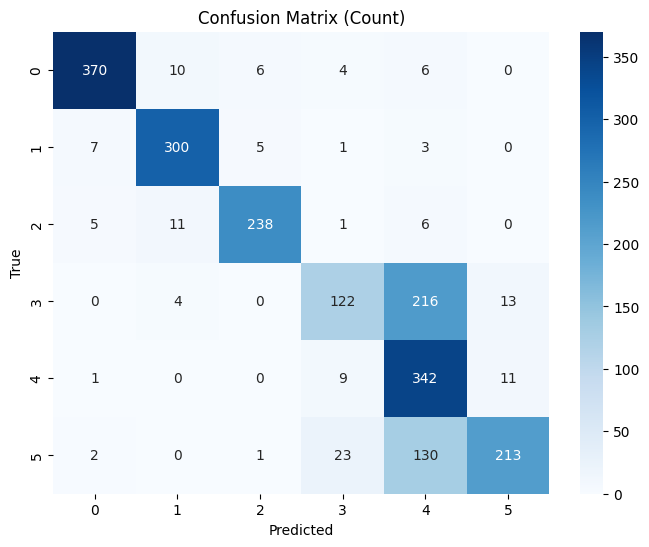

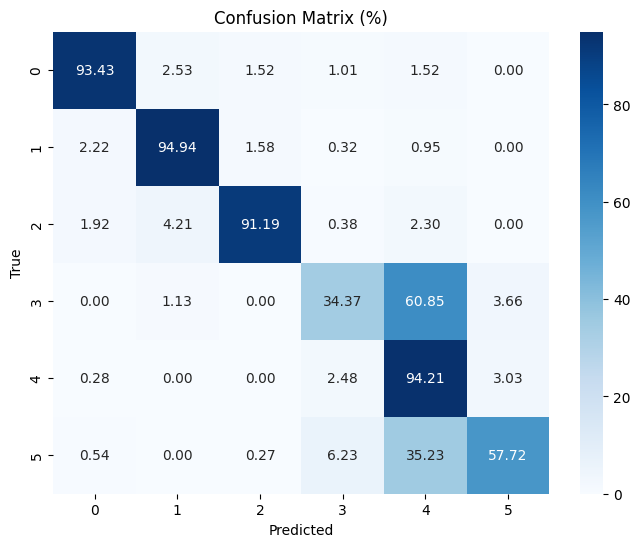

Precision (P): 0.83
Recall (R): 0.78
F1 Score: 0.77


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

def plot_confusion_matrix(y_true, y_pred):
    # Confusion Matrix (Count)
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(6), yticklabels=np.arange(6))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix (Count)')
    plt.show()

    # Confusion Matrix (%)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.arange(6), yticklabels=np.arange(6))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix (%)')
    plt.show()

def evaluate_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    print(f"Precision (P): {precision:.2f}")
    print(f"Recall (R): {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

# Dự đoán trên x_test
y_pred = []
for i in range(x_test.shape[0]):
    y_pred.append(model.predict(x_test[i]))

# True labels (convert one-hot encoded y_test to class indices)
y_true = np.argmax(y_test_one_hot, axis=1)

# Vẽ confusion matrix
plot_confusion_matrix(y_true, y_pred)

# Tính toán Precision, Recall, và F1 Score
evaluate_metrics(y_true, y_pred)


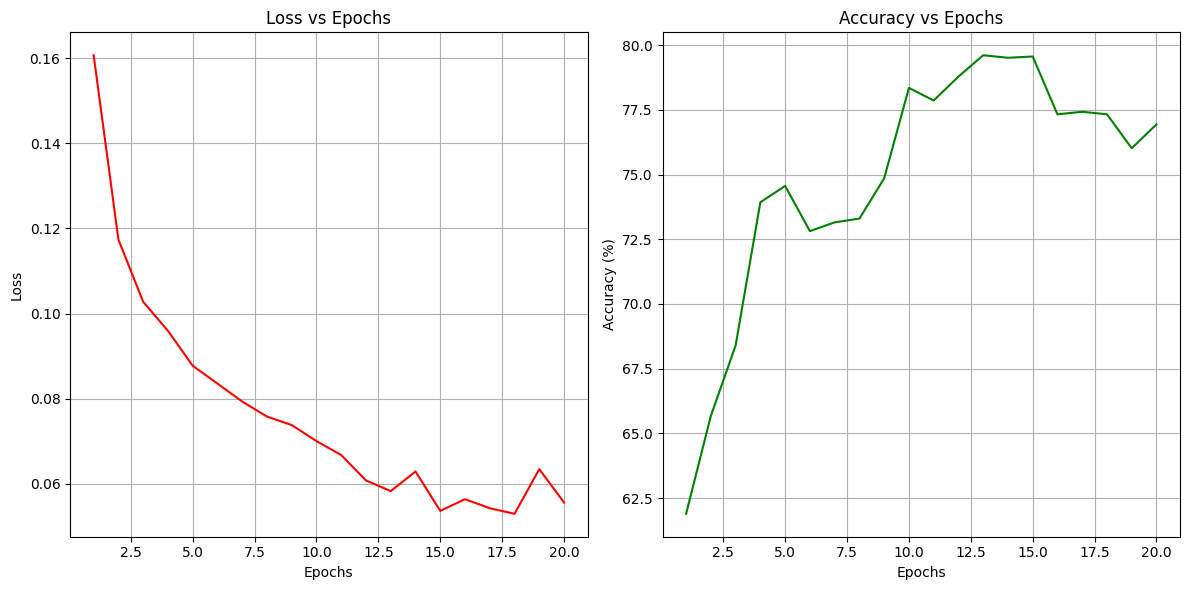

In [ ]:
# Vẽ đồ thị loss và accuracy
def plot_loss_accuracy(loss_history, acc_history):
    epochs = np.arange(1, len(loss_history) + 1)
    
    # Loss plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_history, label='Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epochs')
    plt.grid(True) 

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc_history, label='Accuracy', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy vs Epochs')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


plot_loss_accuracy(model.loss_history, model.acc_history)

In [50]:
# weight and bias
weights_layer1 = model.params['W1']
bias_layer1 = model.params['b1']

weights_layer2 = model.params['W2']
bias_layer2 = model.params['b2']

weights_layer3 = model.params['W3']
bias_layer3 = model.params['b3']

weights_layer4 = model.params['W4']
bias_layer4 = model.params['b4']

weights_layer5 = model.params['W5']
bias_layer5 = model.params['b5']

weights_layer6 = model.params['W6']
bias_layer6 = model.params['b6']
# shape
# print(bias_layer1)
print("Shape of W1:", weights_layer1.shape)
print("Shape of b1:", bias_layer1.shape)

print("Shape of W2:", weights_layer2.shape)
print("Shape of b2:", bias_layer2.shape)

print("Shape of W3:", weights_layer3.shape)
print("Shape of b3:", bias_layer3.shape)

print("Shape of W4:", weights_layer4.shape)
print("Shape of b4:", bias_layer4.shape)

print("Shape of W5:", weights_layer5.shape)
print("Shape of b5:", bias_layer5.shape)

print("Shape of W6:", weights_layer6.shape)
print("Shape of b6:", bias_layer6.shape)

weights = [weights_layer1, weights_layer2, weights_layer3, weights_layer4, weights_layer5, weights_layer6]
biases = [bias_layer1, bias_layer2, bias_layer3, bias_layer4, bias_layer5, bias_layer6]


Shape of W1: (128, 768)
Shape of b1: (128, 1)
Shape of W2: (64, 128)
Shape of b2: (64, 1)
Shape of W3: (64, 64)
Shape of b3: (64, 1)
Shape of W4: (32, 64)
Shape of b4: (32, 1)
Shape of W5: (16, 32)
Shape of b5: (16, 1)
Shape of W6: (6, 16)
Shape of b6: (6, 1)


# TEST WITH DATA SENSOR

In [261]:
# Giả sử đầu vào là một vector input_data
def normalize_input(input_data):
    mean = np.mean(input_data)
    std = np.std(input_data)
    return (input_data - mean) / std

# Hàm tính toán đầu ra cho một đầu vào bất kỳ
def predict_output(input_data, weights, biases):
    # Chuẩn hóa đầu vào
    input_data = normalize_input(input_data)
    input_data = input_data.reshape(6, 128)
    print(input_data)
    # Khởi tạo đầu vào cho lớp đầu tiên
    A = input_data.reshape(-1, 1)  # Chuyển đổi thành dạng cột (num_features, 1)
    
    # Truyền qua từng lớp
    for i in range(len(weights) - 1):
        Z = np.dot(weights[i], A) + biases[i]  # Tính Z
        A = np.maximum(0, Z)  # Hàm kích hoạt ReLU (lớp ẩn)
    
    # Lớp cuối cùng với softmax
    Z_final = np.dot(weights[-1], A) + biases[-1]
    output = softmax(Z_final)  # Hàm softmax cho lớp đầu ra
    
    return output

# Hàm softmax
def softmax(x):
    exps = np.exp(x - np.max(x, axis=0, keepdims=True))
    return exps / np.sum(exps, axis=0, keepdims=True)

# Ví dụ sử dụng:
input_data = (27,27,27,27,27,27,27,27,27,27,27,27,28,28,27,28,28,28,27,27,28,27,27,27,26,27,27,27,28,27,27,27,27,27,27,26,27,27,27,27,27,28,28,28,28,28,27,27,27,28,27,27,28,28,27,27,27,28,28,28,28,27,27,27,27,28,27,27,27,27,28,27,27,28,28,28,28,28,28,27,27,27,27,28,27,27,27,28,27,27,27,28,27,28,27,27,27,27,27,27,28,28,28,27,27,28,27,27,26,27,27,28,28,27,28,27,27,28,28,27,26,27,27,27,28,27,27,105,105,105,105,105,106,106,106,105,105,107,106,105,105,106,105,106,106,107,106,106,105,105,106,106,105,105,105,105,106,105,106,105,105,106,106,105,105,106,106,106,105,105,106,106,105,105,106,106,106,105,105,106,106,106,106,106,105,106,106,105,105,105,105,106,106,105,105,105,106,105,106,105,106,105,106,106,105,105,105,106,105,105,105,105,105,105,104,105,105,105,105,105,105,106,105,105,105,105,106,105,106,105,105,106,105,105,104,105,105,105,104,105,106,106,105,105,105,105,105,105,105,104,105,106,104,105,105,-53,-53,-53,-54,-53,-54,-54,-53,-54,-52,-53,-53,-53,-53,-53,-53,-52,-53,-53,-53,-53,-53,-54,-54,-52,-53,-53,-55,-54,-53,-53,-54,-53,-54,-55,-54,-53,-54,-53,-53,-53,-53,-54,-53,-53,-54,-53,-53,-54,-53,-54,-53,-53,-54,-53,-52,-53,-53,-54,-53,-53,-53,-53,-53,-53,-53,-52,-54,-54,-54,-53,-54,-53,-53,-53,-54,-53,-54,-54,-53,-53,-54,-54,-54,-55,-54,-54,-54,-54,-54,-55,-53,-55,-53,-54,-54,-53,-54,-54,-53,-53,-54,-53,-53,-53,-54,-55,-54,-55,-54,-55,-55,-54,-54,-53,-53,-53,-54,-54,-55,-55,-54,-54,-54,-54,-55,-54,-55,6734,5,6,7,4,13,9,8,7,6,10,12,11,4,8,14,4,12,14,28,27,28,28,8,18,21,15,16,12,10,13,14,12,1,-1,3,2,1,3,6,2,2,-4,0,-1,-3,-7,-3,2,1,5,15,9,6,15,14,21,19,21,17,20,13,10,7,11,16,13,28,23,18,9,15,16,10,19,15,20,14,14,19,22,23,22,16,16,17,15,21,12,11,13,9,7,5,6,12,12,18,12,16,11,13,16,16,22,23,17,14,5,8,9,11,9,11,9,6,9,16,20,14,13,14,9,10,2,9,11,7,2,2,1,4,-5,-3,2,-8,-9,0,-2,-2,-6,-1,3,1,-1,-1,3,6,2,0,1,3,0,1,-1,-3,-2,3,4,-1,-5,-4,-4,2,-5,-1,-5,-2,-2,-3,-7,1,-9,-4,-7,-4,6,-3,-6,-1,-1,-2,1,1,7,4,-4,0,0,-2,0,0,-3,0,-2,0,5,-2,-3,-1,4,0,-4,-6,-2,-3,4,-3,-6,-2,-2,-2,5,3,-1,6,1,1,4,3,1,-2,-7,1,-5,0,5,3,8,3,-1,3,3,-5,-6,-3,-8,-3,-3,-8,-5,0,0,-2,-1,-1,-1,0,5,0,-1,-3,-5,0,3,-6,-8,-8,-5,-9,-10,-8,-6,-5,-1,-1,-3,-3,-2,-3,-5,-3,-2,-9,2,2,-5,-3,-9,-5,-1,0,-9,-8,-12,0,-2,-5,-3,-7,-9,-4,-10,-8,-10,-4,-6,-4,-6,-11,-6,-7,-9,-12,-4,-8,-2,-3,-5,-9,-2,-3,-4,-1,-12,-9,-1,-3,-3,0,-3,-2,0,0,-4,-3,0,-7,-5,-5,-8,-6,-8,-4,2,-1,-2,-9,-6,-3,-4,-6,-5,-4,-8,-4,-4,-4,-4,-3,-7,-2,0,-3,-2,-1,-4,-4,-3,-3,-255,-12,-22,-6,-9,-4,-2,-4,-7,-6,-5,-4,-1,-7,-10,-4,-4,-1,-2,-2,-9,-3,-3,-4,27
)  # Ví dụ đầu vào ngẫu nhiên

# Sử dụng mô hình với các trọng số và bias đã lưu
output = predict_output(input_data, weights, biases)

print("Output:", output)
predicted_class = np.argmax(output)

# Hiển thị kết quả
print(f"Predicted label: {predicted_class+1}")


[[ 1.77980017e-02  1.77980017e-02  1.77980017e-02  1.77980017e-02
   1.77980017e-02  1.77980017e-02  1.77980017e-02  1.77980017e-02
   1.77980017e-02  1.77980017e-02  1.77980017e-02  1.77980017e-02
   2.18432416e-02  2.18432416e-02  1.77980017e-02  2.18432416e-02
   2.18432416e-02  2.18432416e-02  1.77980017e-02  1.77980017e-02
   2.18432416e-02  1.77980017e-02  1.77980017e-02  1.77980017e-02
   1.37527619e-02  1.77980017e-02  1.77980017e-02  1.77980017e-02
   2.18432416e-02  1.77980017e-02  1.77980017e-02  1.77980017e-02
   1.77980017e-02  1.77980017e-02  1.77980017e-02  1.37527619e-02
   1.77980017e-02  1.77980017e-02  1.77980017e-02  1.77980017e-02
   1.77980017e-02  2.18432416e-02  2.18432416e-02  2.18432416e-02
   2.18432416e-02  2.18432416e-02  1.77980017e-02  1.77980017e-02
   1.77980017e-02  2.18432416e-02  1.77980017e-02  1.77980017e-02
   2.18432416e-02  2.18432416e-02  1.77980017e-02  1.77980017e-02
   1.77980017e-02  2.18432416e-02  2.18432416e-02  2.18432416e-02
   2.18432